## Import des données
La première étape est de charger notre fichier dans python.  
Nous allons utiliser une fonction qui prendra comme paramètre le nom du fichier csv (situé dans le même répertoire).  
Cette fonction retournera une liste, dans celle-ci, plusieurs listes. Une liste pour chaque ligne du fichier de données.

In [1]:
import csv

def charger_csv(nom_fic):
    """Fonction qui permet d'importer les données du fichier csv sous forme de liste de listes """
    liste = []  # resultat de la fonction
    # ouverture du fichier CSV
    with open(nom_fic,  # nom du fichier
              "r",  # ouverture en lecture
              newline="",  # évite les problèmes de codage du retour à la ligne
              encoding="utf-8-sig"  # permet de forcer la lecture en utf -8 (sig pour "UTF-8 codec with BOM signature")
              ) as csvfile:  # cvsfile est le fichier que l'on vient d'ouvrir
        # création du lecteur csv indiquant le caractère séparateur
        score_reader = csv.reader(csvfile, delimiter=",")
        for enreg in score_reader:  # boucle de parcours des enregistrements
            # enreg est une liste de str contenant chaque champ de l ' enregistrement
            # ajout de enreg dans la liste
            liste.append(enreg)
    return liste

Ensuite on procède à l'import des données.

In [2]:
from pprint import pprint # Pour un affichage plus lisible.
chiens_loups = charger_csv("chienloup.csv")
pprint(chiens_loups)

[['type',
  '      ident',
  'lcb',
  '     lms',
  'lbm',
  '          lp.',
  '   Lm.',
  '         lam'],
 ['chien', 'bull-dog', '129', '64', '95', '17,5', '11,5', '13,8'],
 ['chien', 'bull-dog', '154', '74', '76', '20', '14,2', '16,5'],
 ['chien', 'chien-ind', '170', '87', '71', '17,9', '12,3', '15,9'],
 ['chien', 'chien-ind', '188', '94', '73', '19,5', '13,3', '14,8'],
 ['chien', 'chien-ind', '161', '81', '55', '17,1', '12,1', '13'],
 ['chien', 'chien-ind', '164', '90', '58', '17,5', '12,7', '14,7'],
 ['chien', 'berger allemand', '203', '109', '65', '20,7', '14', '16,8'],
 ['chien', 'levrier', '178', '97', '57', '17,3', '12,8', '14,3'],
 ['chien', 'levrier', '212', '114', '65', '20,5', '14,3', '15,5'],
 ['chien', 'levrier', '221', '123', '62', '21,2', '15,2', '17'],
 ['chien', 'colley', '183', '97', '52', '19,3', '12,9', '13,5'],
 ['chien', 'doberman', '212', '112', '65', '19,7', '14,2', '16'],
 ['chien', 'setter', '220', '117', '70', '19,8', '14,3', '15,6'],
 ['chien', 'chien des

## Autre méthode : import via panda et un fichier `.xlsx`

In [3]:
import pandas
X = pandas.read_excel("chienloup.xlsx",sheet_name=0,header=0,index_col=0)

In [4]:
#dimension
print(X.shape)

(42, 6)


In [4]:
#nombre d'observations
n = X.shape[0]
print(n)

42


In [5]:
#nombre de variables
p = X.shape[1]
print(p)

6


In [7]:
print(X)

                    lcb       lms  lbm            lp.     Lm.           lam
      ident                                                                
bull-dog            129        64   95           17.5    11.5          13.8
bull-dog            154        74   76           20.0    14.2          16.5
chien-ind           170        87   71           17.9    12.3          15.9
chien-ind           188        94   73           19.5    13.3          14.8
chien-ind           161        81   55           17.1    12.1          13.0
chien-ind           164        90   58           17.5    12.7          14.7
berger allemand     203       109   65           20.7    14.0          16.8
levrier             178        97   57           17.3    12.8          14.3
levrier             212       114   65           20.5    14.3          15.5
levrier             221       123   62           21.2    15.2          17.0
colley              183        97   52           19.3    12.9          13.5
doberman    

### Nous  devons  explicitement  centrer  et  réduire  les  variables  pour  réaliser  une ACP  normée

In [64]:
#scikit-learn
import sklearn
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation–centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-2.77557726 -2.83824975  2.46150342 -1.37535381 -2.10644441 -1.24906381]
 [-1.86055179 -2.1711737   0.37849204 -0.41196388 -0.08211563 -0.16450151]
 [-1.27493549 -1.30397484 -0.16966885 -1.22121142 -1.50664329 -0.40551536]
 [-0.61611715 -0.83702161  0.04959551 -0.60464187 -0.75689189 -0.84737407]
 [-1.60434466 -1.70422047 -1.92378369 -1.52949619 -1.65659357 -1.5704156 ]
 [-1.4945416  -1.10385203 -1.59488716 -1.37535381 -1.20674273 -0.88754304]
 [-0.06710187  0.16359246 -0.82746191 -0.1422147  -0.23206591 -0.04399459]
 [-0.98212734 -0.6368988  -1.70451933 -1.452425   -1.13176759 -1.04821894]
 [ 0.2623073   0.49713048 -0.82746191 -0.2192859  -0.00714049 -0.56619125]
 [ 0.59171647  1.09749892 -1.15635845  0.05046328  0.66763577  0.03634336]
 [-0.79912224 -0.6368988  -2.25268022 -0.68171306 -1.05679245 -1.36957073]
 [ 0.2623073   0.36371527 -0.82746191 -0.52757067 -0.08211563 -0.36534638]
 [ 0.55511545  0.6972533  -0.27930102 -0.48903508 -0.00714049 -0.52602228]
 [ 0.40871138  0.43042288

In [65]:
#vérification -librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))

[-3.38353684e-16 -2.08827664e-16 -3.62144177e-16 -2.43191710e-16
 -4.49375986e-16  6.71420591e-16]


In [66]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


## Les données sont prêtes ! Lançons l'ACP !
Il faut instancier l’objet PCA dans un premier temps, nous affichons ses propriétés

In [67]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


## Calculs : l'ACP est effectué ci-dessous !!! Simple et court.

In [68]:
#calculs
coord = acp.fit_transform(Z)

In [69]:
#nombre de composantes calculées
print(acp.n_components_) 

6


La   propriété `.explained_variance_` semble  faire  l’affaire  pour  obtenir  les  variances (valeurs propres, λk) associées aux axes factoriels.

In [70]:
#variance expliquée
print(acp.explained_variance_)

[4.28371664 0.90767199 0.64955226 0.19119318 0.09337847 0.02082891]


In [71]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.18172339 0.88606075 0.63408673 0.18664097 0.09115517 0.02033299]


PCA fournit également les proportions de variance associées aux axes. Il n’est pas nécessaire d’effectuer une correction dans ce cas.

In [72]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.6969539  0.14767679 0.10568112 0.03110683 0.01519253 0.00338883]


La première composante prend $\approx 70 \%$ de l'information disponible, puis la seconde $15\%$ et la troisième $11\%$. Ci-desous, le graphique "Scree plot" (éboulis des valeurs propres)

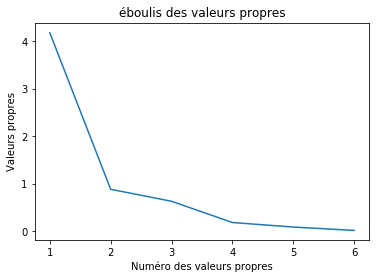

In [73]:
#scree plot
import matplotlib.pyplot as plt
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("éboulis des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Numéro des valeurs propres")
plt.show()

On retrouve les "coudes" vus lors de la présentation de l'ACP qui permettent de choisir le nombre de facteur $K^*$ à retenir. Ici on choisit $K^*=4$.

D’autres  pistes  existent  pour  répondre  à  cette  question  toujours  délicate  qui  conditionne l’interprétation del’ACP, notamment le«test  des  bâtons  brisés»  de  Legendre  &  Legendre (1983)
Les seuils sont définis par: $$ b_k = \sum_{m=k}^{p} \frac{1}{m} $$
Le facteur n°k est validé si (λk> bk),où λk est la valeur propre associée à l’axe n°k

In [74]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [75]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.181723  2.450000
1    0.886061  1.450000
2    0.634087  0.950000
3    0.186641  0.616667
4    0.091155  0.366667
5    0.020333  0.166667


Dans notre cas, seul le premier facteur semble valide.

## Représentation des individus

Les   coordonnées   factorielles   (Fik)   des   individus   ont   été collectées dans la variable coord
Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les individus.

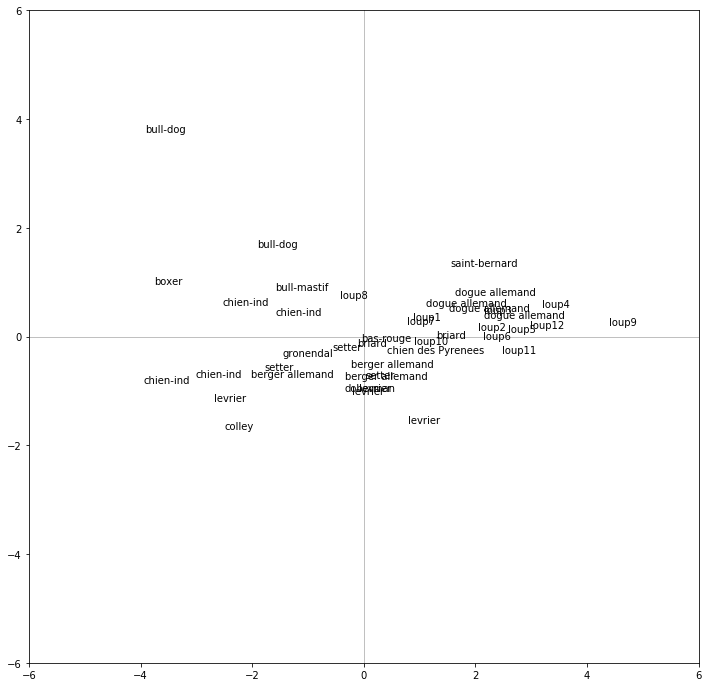

In [76]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Qualité  de  représentation  
Les  COS²  (cosinus  carré).  Pour  calculer  la  qualité  de représentation  des  individus  sur  les  axes,  nous  devons  d’abord  calculer  lescarrés  des distances à  l’origine des  individus,  qui  correspondentégalement  à  leur  contribution  dans l’**inertie totale**
$$d_i^2 = \sum_{j=1}^{p}z_{ij}^2$$

In [79]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))

                    ID        d_i
0             bull-dog  29.707356
1             bull-dog   8.522422
2            chien-ind   7.280372
3            chien-ind   2.739185
4            chien-ind  16.729099
5            chien-ind  10.131368
6      berger allemand   0.791974
7              levrier   8.764800
8              levrier   1.369347
9              levrier   3.341402
10              colley   9.576072
11            doberman   1.304339
12              setter   1.388230
13  chien des Pyrenees   0.509424
14           bas-rouge   0.787840
15     berger allemand   0.378960
16              briard   2.577577
17             levrier   1.232645
18         bull-mastif   3.805050
19              briard   0.431864
20              setter   0.512001
21              setter   4.283252
22               boxer  15.367627
23      dogue allemand   7.706485
24      dogue allemand   2.782481
25           gronendal   3.425677
26     berger allemand   4.730276
27      dogue allemand   5.351142
28       saint

Nous pouvons alors déduire la qualité de représentation des individus sur l’axe n°k avec:
$$COS^2_{ik} = \frac{F^2_{ik}}{d^2_i}$$

In [80]:
#qualité de représentation des individus -COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                    id    COS2_1    COS2_2
0             bull-dog  0.516978  0.474237
1             bull-dog  0.428794  0.315093
2            chien-ind  0.880590  0.045202
3            chien-ind  0.913070  0.058165
4            chien-ind  0.933511  0.043806
5            chien-ind  0.892362  0.055743
6      berger allemand  0.143690  0.772247
7              levrier  0.822645  0.161838
8              levrier  0.032805  0.830340
9              levrier  0.188458  0.755981
10              colley  0.653420  0.300892
11            doberman  0.094413  0.783067
12              setter  0.000383  0.417384
13  chien des Pyrenees  0.337079  0.188445
14           bas-rouge  0.003466  0.008603
15     berger allemand  0.128034  0.822288
16              briard  0.647977  0.000579
17             levrier  0.006068  0.821175
18         bull-mastif  0.665747  0.190223
19              briard  0.028082  0.071393
20              setter  0.611548  0.116583
21              setter  0.741581  0.091610
22         

In [81]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Contribution  des  individus  aux  axes  (CTR). 
Elles   permettent  de   déterminer   les individus qui pèsent le plus dans la définition de chaque facteur.


In [82]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                    id     CTR_1     CTR_2
0             bull-dog  0.087444  0.378570
1             bull-dog  0.020807  0.072159
2            chien-ind  0.036502  0.008843
3            chien-ind  0.014240  0.004281
4            chien-ind  0.088918  0.019692
5            chien-ind  0.051476  0.015176
6      berger allemand  0.000648  0.016434
7              levrier  0.041053  0.038116
8              levrier  0.000256  0.030553
9              levrier  0.003585  0.067878
10              colley  0.035627  0.077426
11            doberman  0.000701  0.027446
12              setter  0.000003  0.015570
13  chien des Pyrenees  0.000978  0.002580
14           bas-rouge  0.000016  0.000182
15     berger allemand  0.000276  0.008373
16              briard  0.009510  0.000040
17             levrier  0.000043  0.027200
18         bull-mastif  0.014423  0.019450
19              briard  0.000069  0.000828
20              setter  0.001783  0.001604
21              setter  0.018085  0.010544
22         

## Représentation des variables –Outils pour l’aide à l’interprétation

Nous  avons  besoin  des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ .components_

In [83]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 0.86804419 -0.24262786 -0.42093642  0.02753162  0.01301465  0.09755084]
 [ 0.86702629 -0.38076234 -0.30055269 -0.01292053 -0.05500387 -0.09879868]
 [ 0.47146126  0.81632121 -0.33239519 -0.02211706 -0.00229455 -0.01905183]
 [ 0.89341119  0.06438612  0.32927944 -0.25530101 -0.15342248  0.02299695]
 [ 0.93701295  0.00324798  0.23555623 -0.07700412  0.24580126 -0.01270998]
 [ 0.88206323  0.10805592  0.30359363  0.3378145  -0.06323277  0.00150612]]


In [84]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

              id     COR_1     COR_2
0            lcb  0.868044 -0.242628
1            lms  0.867026 -0.380762
2            lbm  0.471461  0.816321
3            lp.  0.893411  0.064386
4            Lm.  0.937013  0.003248
5            lam  0.882063  0.108056


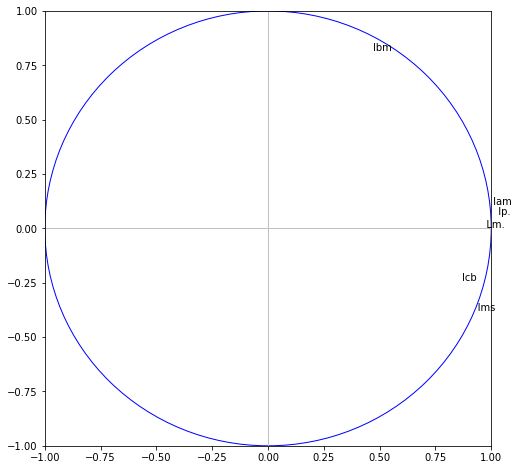

In [85]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes(noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

## Traitement des individus supplémentaires.
Nous  souhaitons positionner  l'"individu" trouvé à Jussac , par  rapport  aux existantes.
Nous  les  chargeons  avec read_excel() de Pandas,  elles  sont situées  dans  le  seconde feuille du classeur Excel (sheet_name = 1).

In [87]:
#chargement des individus supplémentaires
indSupp = pandas.read_excel("chienloup.xlsx",sheet_name=1,header=0,index_col=0)
print(indSupp)

               lcb       lms  lbm            lp.     Lm.           lam
      ident                                                           
canide jussac  210       103   72           20.5      14          16.7


Nous  devons  centrer  et réduire  les  variables  des  individus  supplémentaires à  l’aide  des paramètres (moyennes  et  écarts-type) des  données  actives ayant  servi  à  construire  le  repère factoriel.

In [88]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)

[[ 0.18910526 -0.23665317 -0.06003667 -0.2192859  -0.23206591 -0.08416356]]


Il ne reste plus qu’à faire calculer par la fonction .transform()leurs coordonnées.

In [89]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)

[[-0.27235045 -0.03054248 -0.17699592  0.12734181 -0.00815143  0.28579149]]


Et à les représenter dans le premier plan factoriel parmi les observations actives.

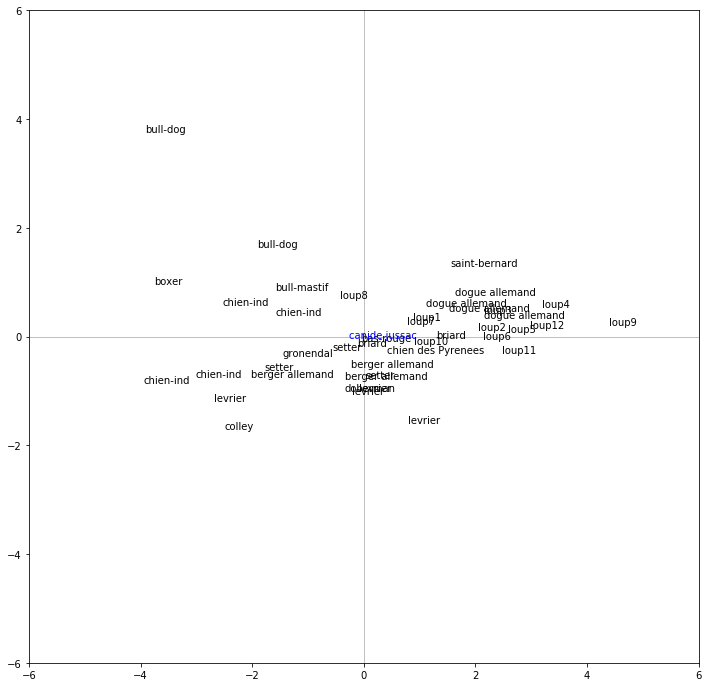

In [93]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

## Représentation avec les axes des valeurs propres 1 et 3 
*Je ne sais plus pourquoi !!!!*

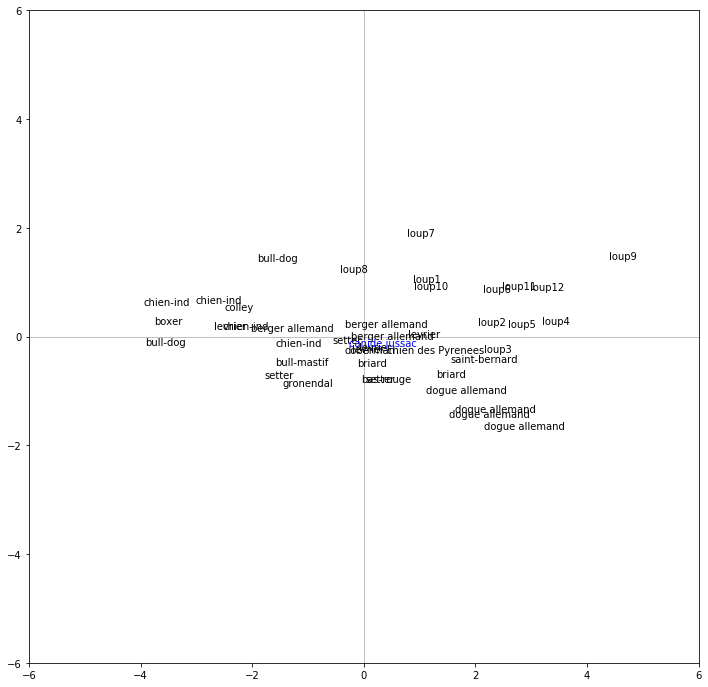

In [94]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,2]))
    
#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,2]),color='b')
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()